In [55]:
## Libraries Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()

In [2]:
## Importing Datas
boston_data = load_boston()

In [3]:
#print(boston_data)
dir(boston_data) # print attributes of data

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
#Printing all the attributes of boston_data 

#print(boston_data.data)
#print(boston_data.feature_names)
#print(boston_data.filename)
#print(boston_data.target)

In [5]:
# Creating dataframe of all the features
data = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

In [6]:
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
# Adding target to dataframe
data['PRICE'] = boston_data.target

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Data Pre-Processing

In [53]:
# Checking for null data

# pd.isnull(data).any() 
# data.info()            {both methods can be used}
# data.describe()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising the data

Text(0, 0.5, 'Number of House')

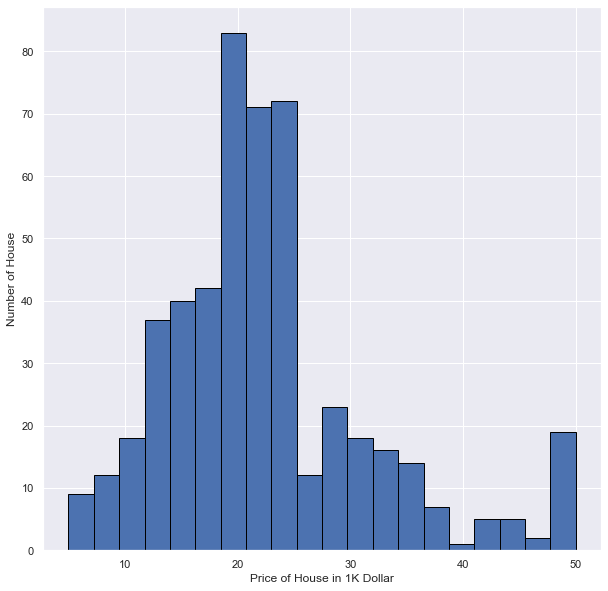

In [9]:
## Plotting Histogram for Price
plt.figure(figsize=(10,10))
plt.hist(data['PRICE'], bins=20, ec='black')
plt.xlabel("Price of House in 1K Dollar")
plt.ylabel('Number of House')

In [10]:
## From Histogram we conclude that price is positively skewed
data["PRICE"].skew()

1.1080984082549072

In [11]:
## Printing coefficient of correlation between variables
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


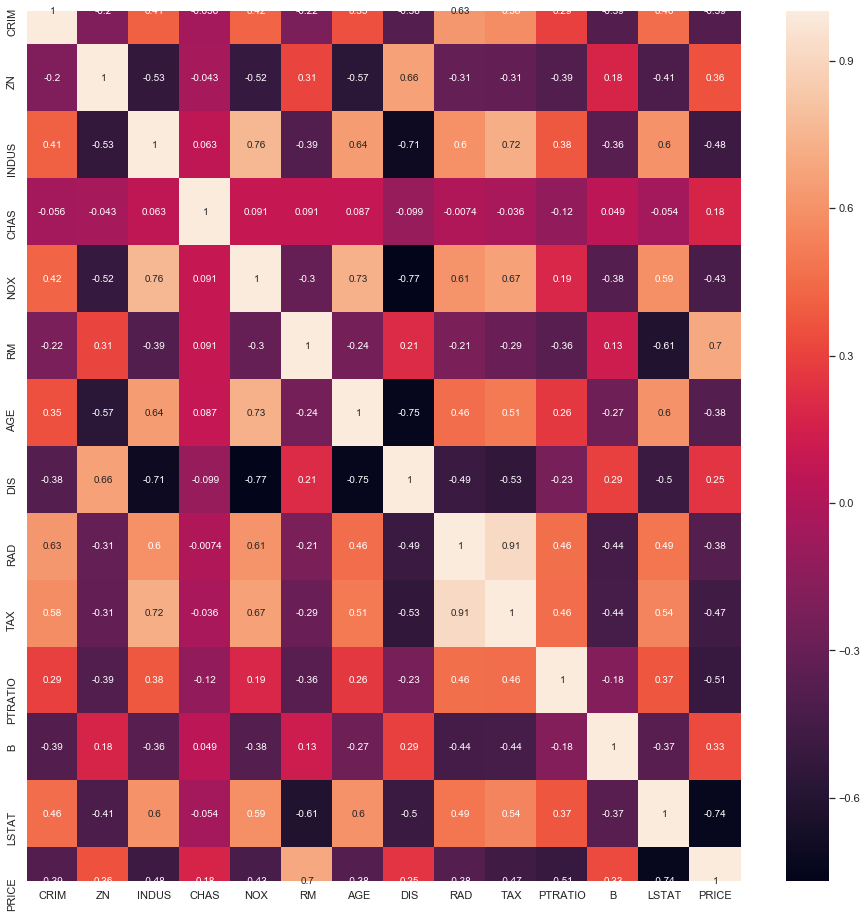

In [12]:
## Plotting Histogram for correlation
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

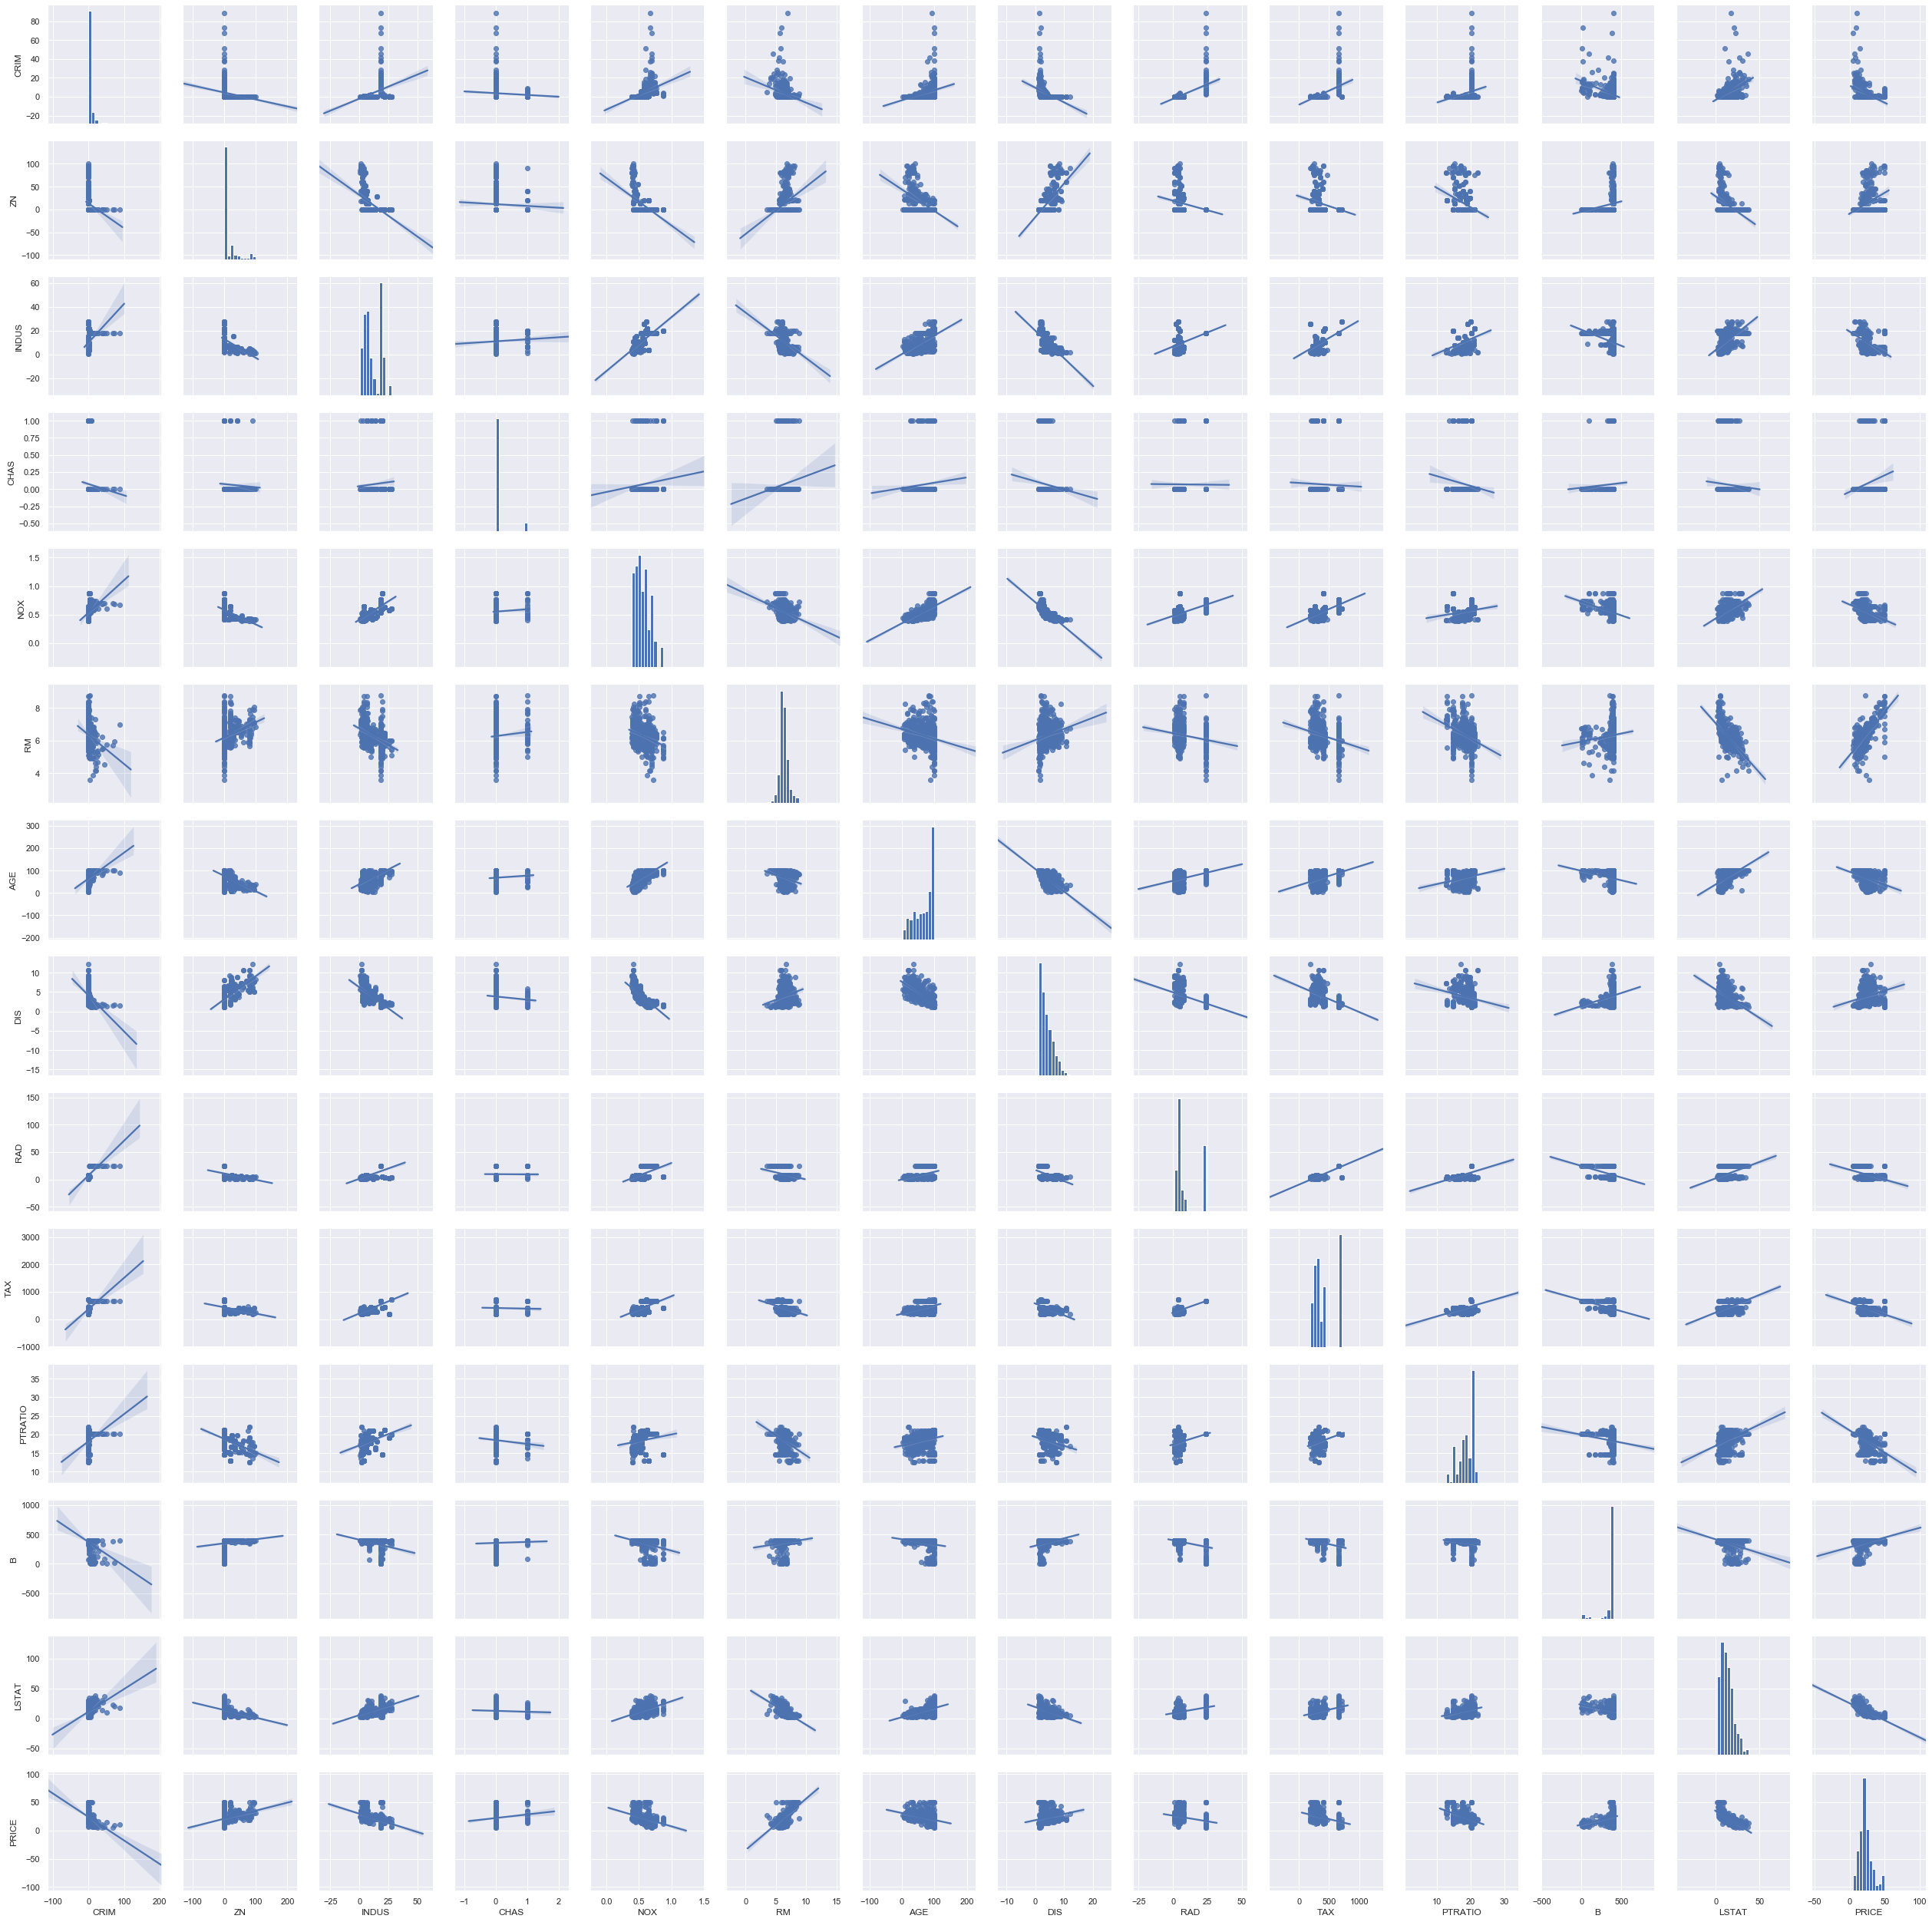

In [62]:
sns.pairplot(data, kind='reg')

In [13]:
## Splitting dataset into training and testing dataset
target = data["PRICE"]
features = data.drop(columns=['PRICE'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [14]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(linear_regression.score(X_train, y_train))
print(linear_regression.score(X_test, y_test))

0.750121534530608
0.6709339839115628


In [16]:
# Data Transformation
# Since Price is highly positively skewed so reducing its skewness by taking log
target_log = np.log(data['PRICE'])
features = data.drop(columns=['PRICE'])

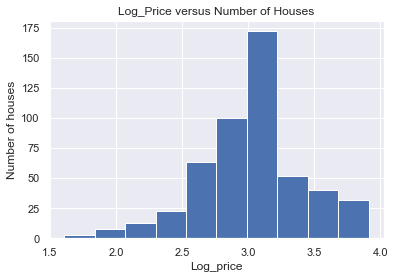

In [17]:
## Plotting Histogram for Log_Price
plt.title("Log_Price versus Number of Houses")
plt.hist(target_log)
plt.xlabel("Log_price")
plt.ylabel("Number of houses")
plt.show()

In [18]:
## Printing skewness of log_price
target_log.skew()

-0.33032129530987864

In [19]:
# Splitting data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=10)          

In [20]:
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(linear_regression.score(X_train, y_train))
print(linear_regression.score(X_test, y_test))

0.7930234826697583
0.7446922306260724


In [24]:
## Evaluating p-values and coefficients
features = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=10)   

In [25]:
result = sm.OLS(y_train, X_train).fit()

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          1.70e-124
Time:                        15:19:43   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
## Checking for multicollinearity
vif = []
for i in range(features.shape[1]):
    multicollinearity = variance_inflation_factor(exog=features.values, exog_idx=i)
    vif.append(multicollinearity)
pd.DataFrame(data=vif, index=features.columns, columns=['VIF'])

,VIF
const,579.255845
CRIM,1.789704
ZN,2.239229
CHAS,1.059819
NOX,3.778011
RM,1.834806
DIS,3.443420
RAD,6.861126
TAX,7.272386
PTRATIO,1.757681


In [62]:
# Since VIF value is not greater than 10 so there is no multicollinearity between variables
## Dropping INDUS because value of p for age is higher and greater then threshold value i.e 0.05
features = data.drop(columns=['PRICE',"INDUS"])

In [41]:
features = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=10)

In [42]:
result = sm.OLS(y_train, X_train).fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          1.99e-125
Time:                        15:23:57   Log-Likelihood:                 111.58
No. Observations:                 404   AIC:                            -197.2
Df Residuals:                     391   BIC:                            -145.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0562      0.227     17.878      0.000       3.610       4.502
CRIM          -0.0107      0.001     -8.022      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.599      0.010       0.000       0.003
CHAS           0.0828      0.038      2.152      0.032       0.007       0.158
NOX           -0.6734      0.161     -4.187      0.000      -0.990      -0.357
RM             0.0717      0.019      3.849      0.000       0.035       0.108
AGE            0.0008      0.001      1.264      0.207      -0.000       0.002
DIS           -0.0494      0.009     -5.704      0.000      -0.066      -0.032
RAD            0.0140      0.003      5.148      0.000       0.009       0.019
TAX           -0.0006      0.000     -4.140      0.000      -0.001      -0.000
PTRATIO       -0.0341      0.006     -5.862      0.000      -0.046      -0.023
B              0.0005      0.000      4.543      0.000       0.000       0.001
LSTAT         -0.0313      0.002    -14.203      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.529   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.223
Skew:                           0.085   Prob(JB):                     1.42e-23
Kurtosis:                       5.494   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
## Dropping Indus and Age (Same Reason)
features = data.drop(columns=['AGE',"PRICE",'INDUS'])

In [46]:
features = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=10)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          3.68e-126
Time:                        15:23:58   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.000       3.591       4.481
CRIM          -0.0107      0.001     -8.002      0.000      -0.013      -0.008
ZN             0.0015      0.001      2.465      0.014       0.000       0.003
CHAS           0.0864      0.038      2.251      0.025       0.011       0.162
NOX           -0.6164      0.155     -3.990      0.000      -0.920      -0.313
RM             0.0761      0.018      4.155      0.000       0.040       0.112
DIS           -0.0527      0.008     -6.376      0.000      -0.069      -0.036
RAD            0.0137      0.003      5.060      0.000       0.008       0.019
TAX           -0.0006      0.000     -4.098      0.000      -0.001      -0.000
PTRATIO       -0.0335      0.006     -5.770      0.000      -0.045      -0.022
B              0.0005      0.000      4.611      0.000       0.000       0.001
LSTAT         -0.0303      0.002    -14.706      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       30.564   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.705
Skew:                           0.117   Prob(JB):                     2.76e-26
Kurtosis:                       5.634   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
## Dropping Indus
features = data.drop(columns=['AGE',"PRICE",'INDUS','ZN'])
features = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=10)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          5.92e-126
Time:                        15:24:24   Log-Likelihood:                 107.65
No. Observations:                 404   AIC:                            -193.3
Df Residuals:                     393   BIC:                            -149.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0455      0.228     17.750      0.000       3.597       4.494
CRIM          -0.0104      0.001     -7.761      0.000      -0.013      -0.008
CHAS           0.0852      0.039      2.206      0.028       0.009       0.161
NOX           -0.6482      0.155     -4.183      0.000      -0.953      -0.344
RM             0.0843      0.018      4.646      0.000       0.049       0.120
DIS           -0.0424      0.007     -5.910      0.000      -0.056      -0.028
RAD            0.0134      0.003      4.906      0.000       0.008       0.019
TAX           -0.0005      0.000     -3.697      0.000      -0.001      -0.000
PTRATIO       -0.0385      0.005     -7.029      0.000      -0.049      -0.028
B              0.0005      0.000      4.647      0.000       0.000       0.001
LSTAT         -0.0302      0.002    -14.573      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       31.222   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.137
Skew:                           0.180   Prob(JB):                     1.64e-25
Kurtosis:                       5.579   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
## Value of R-squared and Adjusted R-squared decreased so dropping only age and indus
## Final Model
features = data.drop(columns=['AGE','INDUS','PRICE'])
features = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=10)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          3.68e-126
Time:                        15:26:52   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.000       3.591       4.481
CRIM          -0.0107      0.001     -8.002      0.000      -0.013      -0.008
ZN             0.0015      0.001      2.465      0.014       0.000       0.003
CHAS           0.0864      0.038      2.251      0.025       0.011       0.162
NOX           -0.6164      0.155     -3.990      0.000      -0.920      -0.313
RM             0.0761      0.018      4.155      0.000       0.040       0.112
DIS           -0.0527      0.008     -6.376      0.000      -0.069      -0.036
RAD            0.0137      0.003      5.060      0.000       0.008       0.019
TAX           -0.0006      0.000     -4.098      0.000      -0.001      -0.000
PTRATIO       -0.0335      0.006     -5.770      0.000      -0.045      -0.022
B              0.0005      0.000      4.611      0.000       0.000       0.001
LSTAT         -0.0303      0.002    -14.706      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       30.564   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.705
Skew:                           0.117   Prob(JB):                     2.76e-26
Kurtosis:                       5.634   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
predict_values = result.predict(X_test)

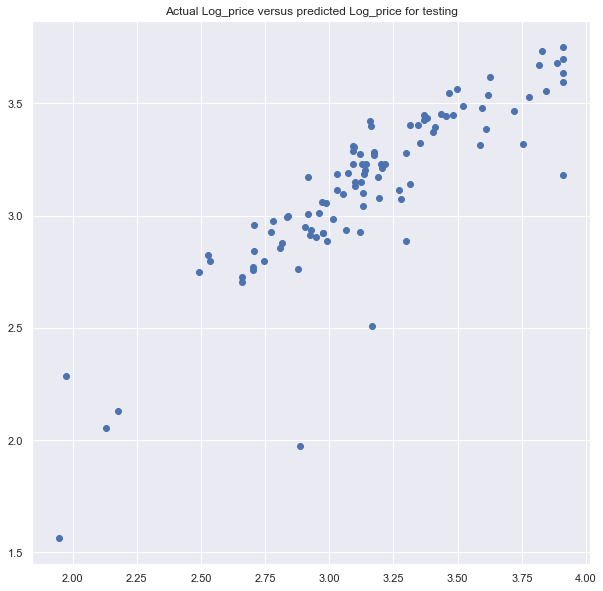

In [70]:
## Plotting Scatter plot for predicted log_price and actual log_price for testing dataset
plt.figure(figsize=(10,10))
plt.title("Actual Log_price versus predicted Log_price for testing")
plt.scatter(y_test, predict_values)

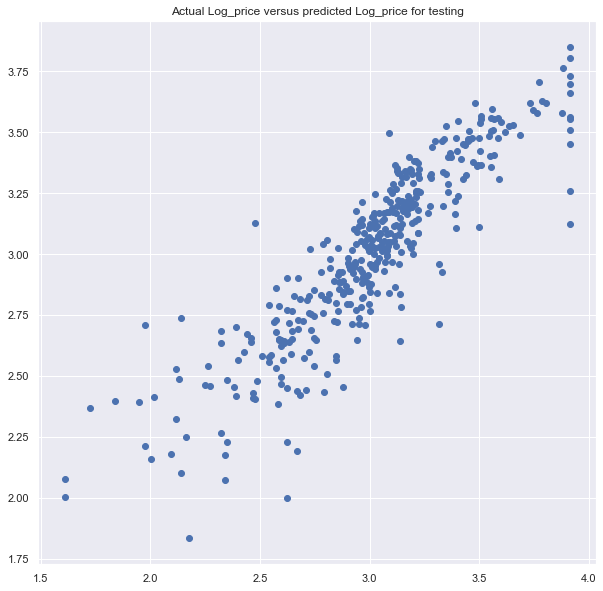

In [71]:
## Plotting Scatter plot for predicted log_price and actual log_price for training dataset
plt.figure(figsize=(10,10))
plt.title("Actual Log_price versus predicted Log_price for testing")
plt.scatter(y_train, result.fittedvalues)